In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from patsy import dmatrices

In [6]:
df = pd.read_csv('./csv파일/데이터셋_2_2(심각도).csv',encoding='cp949')

In [7]:
df

,사고유형,연령가해자,법규위반가해자,행동유형가해자,피해자신체상해주부위,차량용도가해자_중분류,도로종류,도로형태,도로선형,발생시각,심각도
0,1,1,4,8,9,2,0,3,1,1,0
1,4,6,4,8,15,10,2,3,1,3,1
2,2,1,4,8,0,10,2,3,1,4,0
3,2,2,4,3,0,15,0,3,1,2,1
4,4,4,4,8,15,10,0,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
58054,2,5,4,8,2,10,2,3,1,1,0
58055,1,2,0,3,2,10,3,2,1,4,0
58056,3,3,4,8,6,10,3,3,1,3,1
58057,0,6,4,8,9,10,2,3,1,3,1


In [9]:
x=df.drop(['심각도'],axis=1)
y=pd.DataFrame(df['심각도'])

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,shuffle=True) 

In [10]:
log = LogisticRegression()
log.fit(x_train,y_train)

y_pred = log.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.13      0.21      5724
           1       0.69      0.94      0.80     11694

    accuracy                           0.68     17418
   macro avg       0.61      0.54      0.51     17418
weighted avg       0.64      0.68      0.60     17418



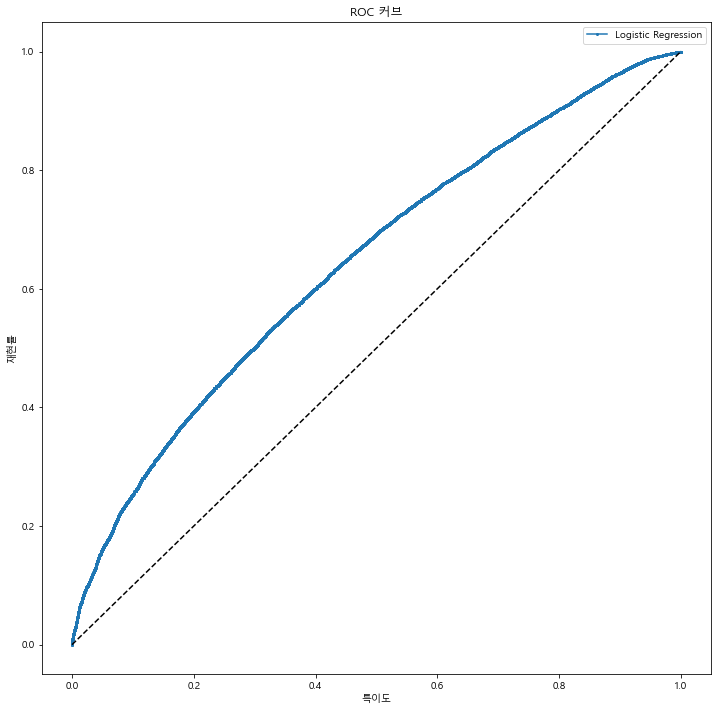

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
rcParams['figure.figsize'] = 12,12


from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


fpr, tpr, threshold = roc_curve(y_train, log.decision_function(x_train))

plt.plot(fpr,tpr, 'o-', ms=2, label="Logistic Regression")
plt.legend()
plt.plot([0,1],[0,1], 'k--',label='radom guess')
plt.xlabel('특이도')
plt.ylabel('재현률')
plt.title('ROC 커브')
plt.show()

#### AUC 값은 0.5~1의 범위를 가지는데 0.5면 성능이 전혀 없음. 1이면 최고의 성능이라고 할 수 있다.

In [33]:
print('AUC: {}'.format(auc(fpr,tpr)))  # 0.5에 가까울 수록 성능이 좋지 못함

AUC: 0.6452930522853786


#### 위 과정을 통해 로지스틱 회귀 모델을 생성하고 평가

In [46]:
import statsmodels.api as sm

logit = sm.Logit(y,x)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.609846
         Iterations 5


In [47]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                    심각도   No. Observations:                58059
Model:                          Logit   Df Residuals:                    58049
Method:                           MLE   Df Model:                            9
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                 0.03878
Time:                        17:25:31   Log-Likelihood:                -35407.
converged:                       True   LL-Null:                       -36836.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
사고유형            0.0890      0.005     17.403      0.000       0.079       0.099
연령가해자          -0.0099      0.006     -1.767      0.077      -0.021       0.001
법규위반가해자        -0.0749      0.007    -10.281    

In [48]:
print(np.exp(result.params))

사고유형           1.093075
연령가해자          0.990166
법규위반가해자        0.927819
행동유형가해자        1.056471
피해자신체상해주부위     1.044624
차량용도가해자_중분류    1.035441
도로종류           1.073870
도로형태           0.841102
도로선형           0.978385
발생시각           1.063350
dtype: float64


#### 도로선형과 연령가해자를 제거 한 후 다시 돌려보자

In [40]:
x2 = x.drop(['도로선형','연령가해자'],axis=1)

In [41]:
logit = sm.Logit(y,x2)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.609893
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    심각도   No. Observations:                58059
Model:                          Logit   Df Residuals:                    58051
Method:                           MLE   Df Model:                            7
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                 0.03871
Time:                        17:14:31   Log-Likelihood:                -35410.
converged:                       True   LL-Null:                       -36836.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
사고유형            0.0885      0.005     17.329      0.000       0.078       0.098
법규위반가해자        -0.0772    

#### 독립변수들의 오즈비를 구해보자
#### 오즈비는 1을 기준으로 1보다 크면 심각한사고일 확률이 커지고 1보다 작으면 심각하지 않은 사고 일 확률이 커진다는 것을 나타낸다. 
#### 오즈비가 1 이면 결과에 별다른 영향을 미치지 않는 다고 볼 수 있다.
#### 회귀계수가 변수의 오즈비의 로그값이므로 exp을 취해서 보자

In [42]:
print(np.exp(result.params))

사고유형           1.092493
법규위반가해자        0.925711
행동유형가해자        1.054624
피해자신체상해주부위     1.044357
차량용도가해자_중분류    1.033010
도로종류           1.072655
도로형태           0.835564
발생시각           1.062186
dtype: float64


#### 오즈비가 다들 2를 넘지 않는 것으로보아 엄청 큰 영향을 주는 것 같진 않다.
#### 더미변수로 바꾸어 각 속성마다 파악해보는 것도 좋을 것 같다. 